# MLP en clasificación aplicada
Este notebook compara tres modelos MLP aplicados a distintos datasets:
- Iris (datos estructurados)
- EMNIST Letters (letras manuscritas)
- CIFAR-10 (imágenes reales sin convoluciones)

## 1. Dataset Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train_cat = to_categorical(y_train, 3)
y_test_cat = to_categorical(y_test, 3)

model_iris = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_iris = model_iris.fit(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat), verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.5075 - loss: 0.9890 - val_accuracy: 0.9000 - val_loss: 0.7688
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8125 - loss: 0.7114 - val_accuracy: 0.9000 - val_loss: 0.5973
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8071 - loss: 0.6051 - val_accuracy: 0.9000 - val_loss: 0.4815
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8038 - loss: 0.5120 - val_accuracy: 0.9000 - val_loss: 0.3958
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8217 - loss: 0.4517 - val_accuracy: 0.9000 - val_loss: 0.3360
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8238 - loss: 0.3840 - val_accuracy: 0.9000 - val_loss: 0.2964
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8144 - loss: 0.3478 - val_accuracy: 0.9000 - val_loss: 0.2662
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8554 - loss: 0.3237 - val_accuracy: 0.9000 - val_loss: 0.2426

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


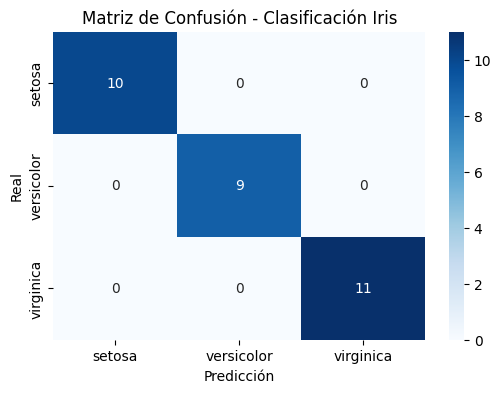

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Obtener predicciones del modelo (en one-hot)
y_pred_proba = model_iris.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# 2. Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels = iris.target_names

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Clasificación Iris')
plt.show()

In [ ]:
# 3. Informe de clasificación
print("Informe de Clasificación:\n")
print(classification_report(y_true, y_pred, target_names=labels))

Informe de Clasificación:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 2. Dataset EMNIST Letters

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return tf.reshape(image, [-1]), label - 1

ds_train = ds_train.map(preprocess).batch(128).prefetch(1)
ds_test = ds_test.map(preprocess).batch(128).prefetch(1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.GTETE5_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.GTETE5_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


In [ ]:
model_emnist = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(62, activation='softmax')
])
model_emnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_emnist = model_emnist.fit(ds_train, epochs=20, validation_data=ds_test, verbose=1)

Epoch 1/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5923 - loss: 1.4698 - val_accuracy: 0.8356 - val_loss: 0.5604
Epoch 2/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8434 - loss: 0.5155 - val_accuracy: 0.8666 - val_loss: 0.4358
Epoch 3/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8785 - loss: 0.3837 - val_accuracy: 0.8797 - val_loss: 0.3876
Epoch 4/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8984 - loss: 0.3174 - val_accuracy: 0.8890 - val_loss: 0.3646
Epoch 5/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9122 - loss: 0.2735 - val_accuracy: 0.8921 - val_loss: 0.3532
Epoch 6/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9231 - loss: 0.2399 - val_accuracy: 0.8919 - val_loss: 0.3538
Epoch 7/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9309 - loss: 0.2126 - val_accuracy: 0.8919 - val_loss: 0.3573
Epoch 8/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9366 - loss: 0.1899 - val_accuracy: 

 La ejecución de la siguiente celda ha sido suprimida en este renderizado. La matriz de confusión completa, debido a su dimensionalidad, excede los límites de visualización en GitHub. **Para reproducir los resultados, ejecútela localmente.**

In [ ]:
# 1. Obtener predicciones del modelo
y_pred_probs = model_emnist.predict(ds_test)  # Probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.concatenate([y for x, y in ds_test], axis=0)

# 2. Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Matriz de confusión EMNIST")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.show()

# 3. Informe de clasificación
print("Informe de Clasificación:\n")
print(classification_report(y_true, y_pred))

## 3. Dataset CIFAR-10

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(-1, 32*32*3).astype('float32') / 255
X_test = X_test.reshape(-1, 32*32*3).astype('float32') / 255

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model_cifar = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cifar = model_cifar.fit(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat), verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2791 - loss: 1.9998 - val_accuracy: 0.3600 - val_loss: 1.7625
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3806 - loss: 1.7249 - val_accuracy: 0.4148 - val_loss: 1.6340
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4189 - loss: 1.6192 - val_accuracy: 0.4223 - val_loss: 1.5969
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4323 - loss: 1.5789 - val_accuracy: 0.4514 - val_loss: 1.5408
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4515 - loss: 1.5260 - val_accuracy: 0.4381 - val_loss: 1.5829
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4557 - loss: 1.5164 - val_accuracy: 0.4651 - val_loss: 1.4971
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4663 - loss: 1.4878 - val_accuracy: 0.4469 - val_loss: 1.5446
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4810 - loss: 1.4575 - 

 La ejecución de la siguiente celda ha sido suprimida en este renderizado. La matriz de confusión completa, debido a su dimensionalidad, excede los límites de visualización en GitHub. **Para reproducir los resultados, ejecútela localmente.**

In [ ]:
# 1. Obtener predicciones
y_pred_proba = model_cifar.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Etiquetas legibles
labels = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

#2. Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión - CIFAR-10')
plt.show()

#3. Informe de clasificación
print("Informe de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=labels))

## Comparación de precisión en validación

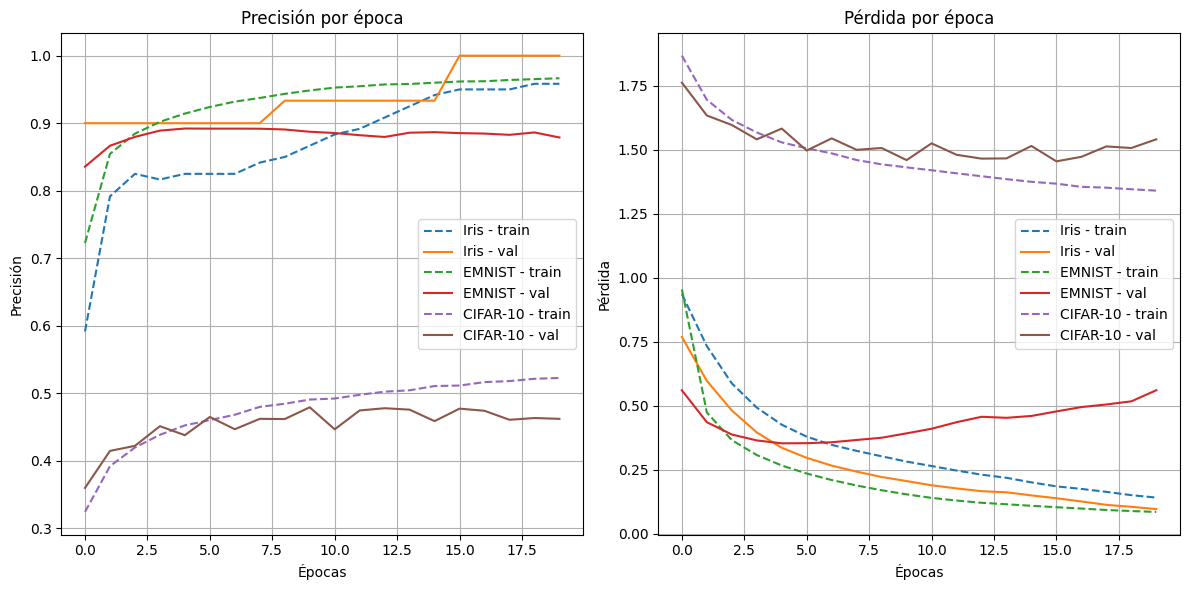

In [ ]:


plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history_iris.history['accuracy'], label='Iris - train', linestyle='--')
plt.plot(history_iris.history['val_accuracy'], label='Iris - val')
plt.plot(history_emnist.history['accuracy'], label='EMNIST - train', linestyle='--')
plt.plot(history_emnist.history['val_accuracy'], label='EMNIST - val')
plt.plot(history_cifar.history['accuracy'], label='CIFAR-10 - train', linestyle='--')
plt.plot(history_cifar.history['val_accuracy'], label='CIFAR-10 - val')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_iris.history['loss'], label='Iris - train', linestyle='--')
plt.plot(history_iris.history['val_loss'], label='Iris - val')
plt.plot(history_emnist.history['loss'], label='EMNIST - train', linestyle='--')
plt.plot(history_emnist.history['val_loss'], label='EMNIST - val')
plt.plot(history_cifar.history['loss'], label='CIFAR-10 - train', linestyle='--')
plt.plot(history_cifar.history['val_loss'], label='CIFAR-10 - val')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
